In [2]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

from src.model.SharpNet import SharpNet
from src.model.utils import INPUT_DIR, TARGET_DIR, NUM_CHANNELS, get_device

In [4]:
# load model
ckpt_path = "../src/ckpt/ckpt_800"
ckpt = torch.load(ckpt_path, map_location=torch.device('cpu'))
model = SharpNet(NUM_CHANNELS)
model.load_state_dict(ckpt["model_state_dict"])

/var/folders/6n/sm2tfzkn2hjd8cpfn_256ph00000gp/T/ipykernel_7525/2102850210.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location=torc

<All keys matched successfully>

In [5]:
# load image 131, 0
image_idx = 0
image_name = f"Image_{image_idx}.png"
input_image = Image.open(os.path.join(INPUT_DIR, image_name))
target_image = Image.open(os.path.join(TARGET_DIR, image_name))
input_tensor =  torch.tensor(np.array(input_image, dtype=np.float32)).unsqueeze(0) / 255.0
target_tensor = torch.tensor(np.array(target_image, dtype=np.float32)).unsqueeze(0) / 255.0

# make prediction
output_tensor = model(input_tensor.unsqueeze(0))

# post-process prediction backgroun
background_threshold = 0.8
output_tensor = torch.where(output_tensor > background_threshold, torch.tensor(1.0), output_tensor)

text_threshold = 0.5 
output_tensor = torch.where(output_tensor < text_threshold, torch.tensor(0.0), output_tensor)


# process before plot
input_image_numpy = (input_tensor).permute(1, 2, 0).detach().numpy()
target_image_numpy = (target_tensor).permute(1, 2, 0).detach().numpy()
output_image_numpy = (output_tensor[0]).permute(1, 2, 0).detach().numpy()


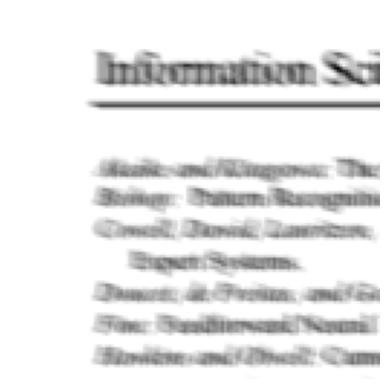

In [6]:
plt.imshow(input_image_numpy, cmap='gray')
plt.axis('off')
plt.show()

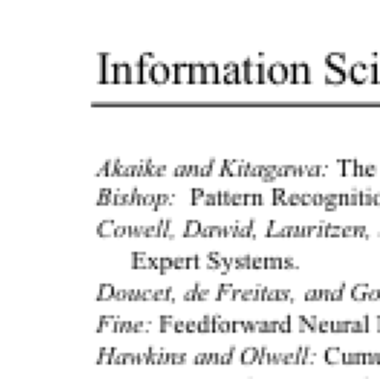

In [7]:
plt.imshow(target_image_numpy, cmap='gray')
plt.axis('off')
plt.show()

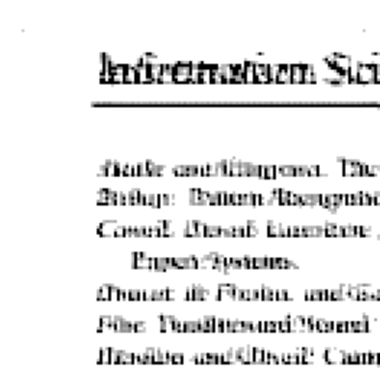

In [8]:
plt.imshow(output_image_numpy, cmap='gray')
plt.axis('off')
plt.show()

In [9]:
num_images = len([f for f in os.listdir(INPUT_DIR) if f.endswith(('.jpg', '.png', '.jpeg', '.webp'))])

In [10]:
num_images * 0.1

140.4

In [11]:
num_images - 140

1264

In [18]:
test_indices = np.random.choice(num_images, 140, replace=False)

In [19]:
import json 

test_indices = test_indices.tolist()
with open("test_indices.json", "w") as f:
    json.dump(test_indices, f)